In [33]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения графиков
%matplotlib inline
plt.style.use('seaborn-v0_8')

In [34]:
# 1. Загрузка данных из UCI repository
print("1. Загрузка данных из UCI repository...")
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"

try:
    # Загрузка данных
    data = pd.read_excel(url)
    print("Данные успешно загружены!")
except Exception as e:
    print(f"Ошибка загрузки данных: {e}. Создаем демо-данные...")
    # Создание демо-данных если загрузка не удалась
    np.random.seed(42)
    n_samples = 768
    data = pd.DataFrame({
        'X1': np.random.uniform(0.5, 1, n_samples),
        'X2': np.random.uniform(500, 800, n_samples),
        'X3': np.random.uniform(300, 400, n_samples),
        'X4': np.random.uniform(0, 5, n_samples),
        'X5': np.random.uniform(0, 1, n_samples),
        'X6': np.random.uniform(0, 1, n_samples),
        'X7': np.random.uniform(0, 1, n_samples),
        'X8': np.random.uniform(1, 5, n_samples),
        'Y1': np.random.uniform(5, 45, n_samples),
        'Y2': np.random.uniform(5, 45, n_samples)
    })

print(f"Размерность данных: {data.shape}")
print("\nПервые 5 строк данных:")
print(data.head())

1. Загрузка данных из UCI repository...
Данные успешно загружены!
Размерность данных: (768, 10)

Первые 5 строк данных:
     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None

Описательная статистика:
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.50000

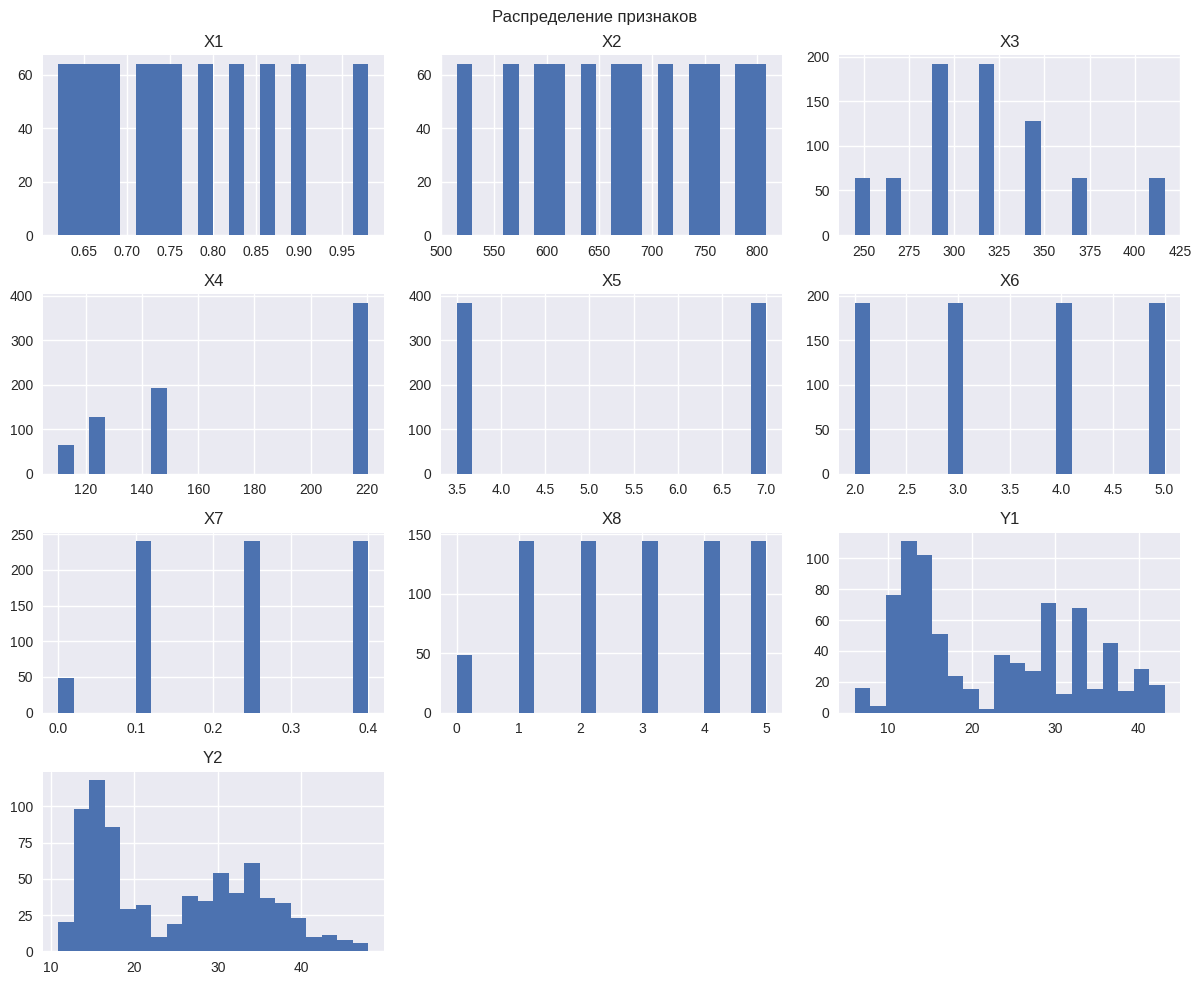

In [35]:
# Анализ данных
print("Информация о данных:")
print(data.info())

print("\nОписательная статистика:")
print(data.describe())

# Проверка на пропущенные значения
print("\nПропущенные значения:")
print(data.isnull().sum())

# Гистограммы распределения признаков
data.hist(figsize=(12, 10), bins=20)
plt.suptitle('Распределение признаков')
plt.tight_layout()
plt.show()

In [36]:
# 2. Разделение данных на обучающую и тестовую выборки
print("2. Разделение данных на обучающую и тестовую выборки...")
X = data.drop(['Y1', 'Y2'], axis=1)
y1 = data['Y1']
y2 = data['Y2']

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

# Масштабирование данных для нейросетевых моделей
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Масштабирование данных завершено!")

2. Разделение данных на обучающую и тестовую выборки...
Обучающая выборка: (614, 8)
Тестовая выборка: (154, 8)
Масштабирование данных завершено!


In [37]:
# 3. Построение моделей для Y1
print("3. Построение моделей для Y1 (Heating Load)...")

# Создадим словарь для хранения результатов
results = {}

# Линейная регрессия для Y1
print("Обучение линейной регрессии для Y1...")
lr_y1 = LinearRegression()
lr_y1.fit(X_train, y1_train)
y1_lr_pred = lr_y1.predict(X_test)

# Нейросетевая модель для Y1
print("Обучение нейросетевой модели для Y1...")
nn_y1 = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', 
                     solver='adam', max_iter=1000, random_state=42)
nn_y1.fit(X_train_scaled, y1_train)
y1_nn_pred = nn_y1.predict(X_test_scaled)

print("Модели для Y1 обучены!")

3. Построение моделей для Y1 (Heating Load)...
Обучение линейной регрессии для Y1...
Обучение нейросетевой модели для Y1...
Модели для Y1 обучены!


In [38]:
# 3. Построение моделей для Y2
print("3. Построение моделей для Y2 (Cooling Load)...")

# Линейная регрессия для Y2
print("Обучение линейной регрессии для Y2...")
lr_y2 = LinearRegression()
lr_y2.fit(X_train, y2_train)
y2_lr_pred = lr_y2.predict(X_test)

# Нейросетевая модель для Y2
print("Обучение нейросетевой модели для Y2...")
nn_y2 = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', 
                     solver='adam', max_iter=1000, random_state=42)
nn_y2.fit(X_train_scaled, y2_train)
y2_nn_pred = nn_y2.predict(X_test_scaled)

print("Модели для Y2 обучены!")

3. Построение моделей для Y2 (Cooling Load)...
Обучение линейной регрессии для Y2...
Обучение нейросетевой модели для Y2...
Модели для Y2 обучены!


In [39]:
# Функция для расчета метрик качества
def calculate_metrics(y_true, y_pred, model_name, target):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    results[f"{model_name}_{target}"] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'MAPE': mape
    }
    
    return mse, mae, r2, mape

print("Функция для расчета метрик создана!")

Функция для расчета метрик создана!


In [40]:
# 4. Оценка качества моделей
print("4. Оценка качества моделей...")

# Расчет метрик для всех моделей
print("Метрики для Y1 (Heating Load):")
print("Линейная регрессия:", calculate_metrics(y1_test, y1_lr_pred, "Linear", "Y1"))
print("Нейросетевая модель:", calculate_metrics(y1_test, y1_nn_pred, "NeuralNetwork", "Y1"))

print("\nМетрики для Y2 (Cooling Load):")
print("Линейная регрессия:", calculate_metrics(y2_test, y2_lr_pred, "Linear", "Y2"))
print("Нейросетевая модель:", calculate_metrics(y2_test, y2_nn_pred, "NeuralNetwork", "Y2"))

# Создаем DataFrame с результатами
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nСводная таблица результатов:")
print(results_df)

4. Оценка качества моделей...
Метрики для Y1 (Heating Load):
Линейная регрессия: (9.151736165801019, 2.182512239485149, 0.9121987467347555, 10.268876619096849)
Нейросетевая модель: (0.3733444960484513, 0.4600667876106201, 0.9964181534455472, 2.1081427749908666)

Метрики для Y2 (Cooling Load):
Линейная регрессия: (9.896048105943512, 2.195399539011747, 0.8931972456590836, 8.478896727842319)
Нейросетевая модель: (1.710208717220485, 0.9063746004621829, 0.9815426320141581, 3.333349564658244)

Сводная таблица результатов:
                       MSE       MAE        R2       MAPE
Linear_Y1         9.151736  2.182512  0.912199  10.268877
NeuralNetwork_Y1  0.373344  0.460067  0.996418   2.108143
Linear_Y2         9.896048  2.195400  0.893197   8.478897
NeuralNetwork_Y2  1.710209  0.906375  0.981543   3.333350


5. Визуализация результатов для Y1...


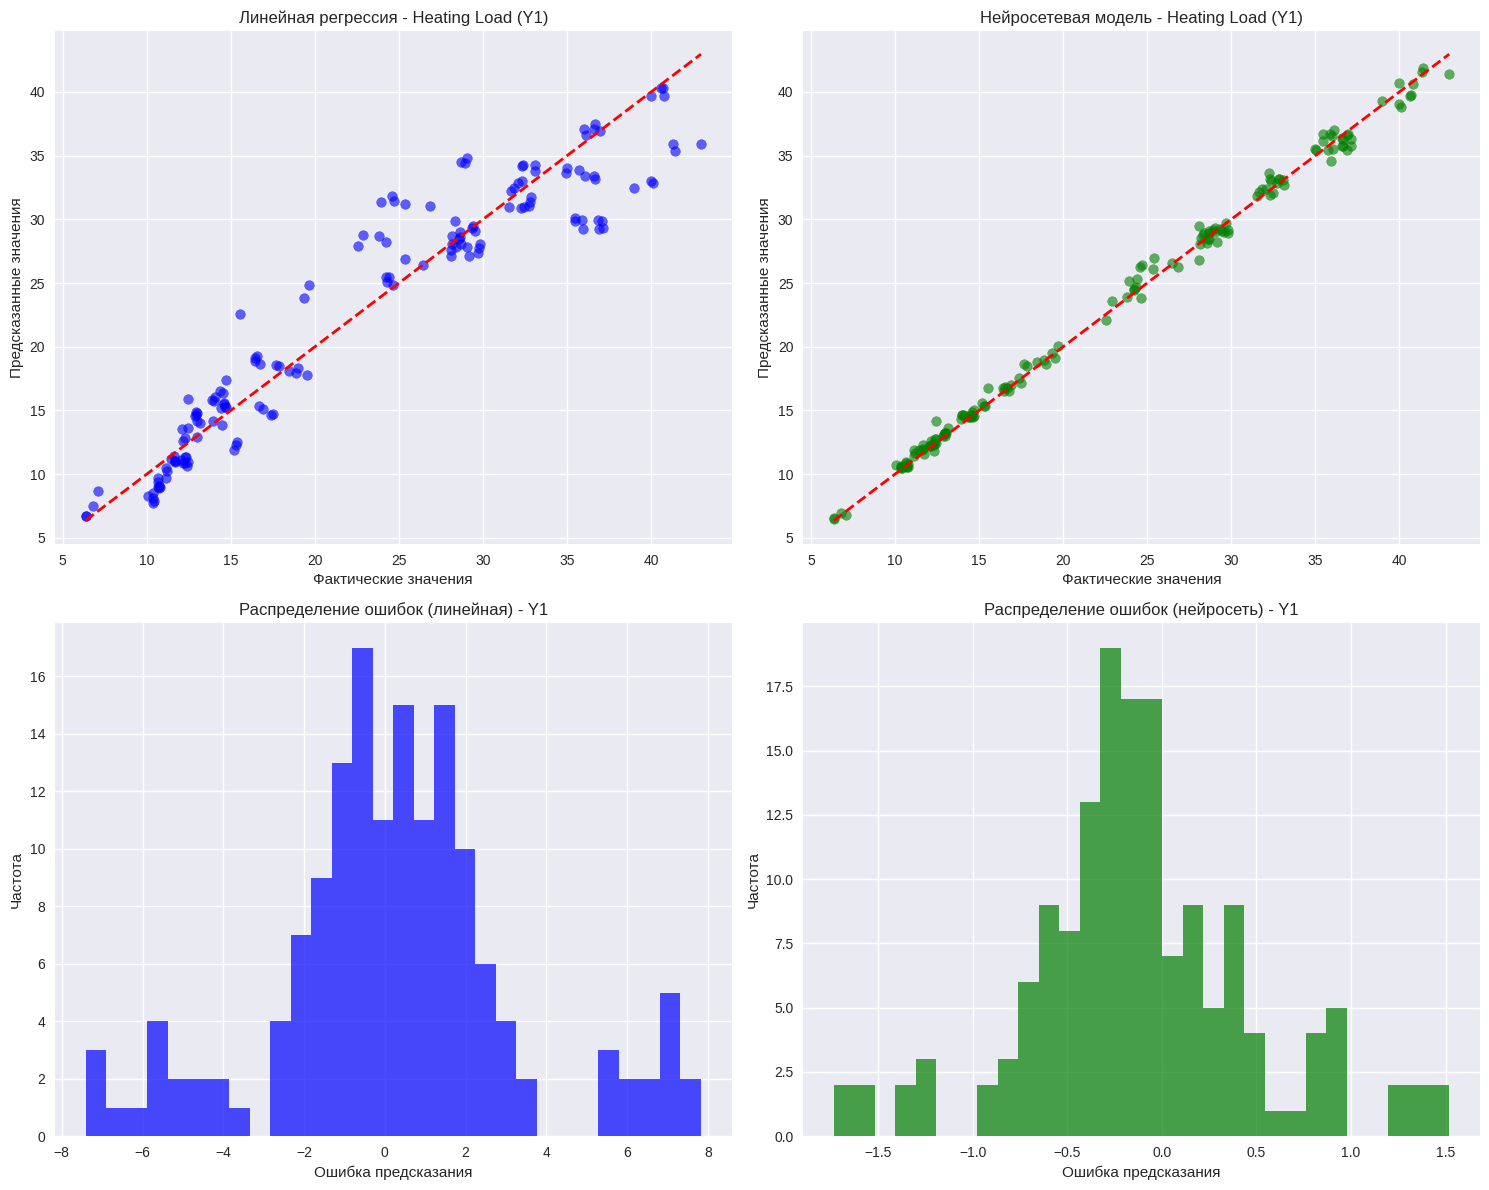

In [ ]:
# 5. Визуализация результатов для Y1
print("5. Визуализация результатов для Y1...")

def plot_comparison_y1(y_true, y_pred_lr, y_pred_nn):
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # График предсказаний vs фактические значения для линейной регрессии
    axes[0, 0].scatter(y_true, y_pred_lr, alpha=0.6, color='blue')
    axes[0, 0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    axes[0, 0].set_xlabel('Фактические значения')
    axes[0, 0].set_ylabel('Предсказанные значения')
    axes[0, 0].set_title('Линейная регрессия - Heating Load (Y1)')
    axes[0, 0].grid(True)
    
    # График предсказаний vs фактические значения для нейросети
    axes[0, 1].scatter(y_true, y_pred_nn, alpha=0.6, color='green')
    axes[0, 1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    axes[0, 1].set_xlabel('Фактические значения')
    axes[0, 1].set_ylabel('Предсказанные значения')
    axes[0, 1].set_title('Нейросетевая модель - Heating Load (Y1)')
    axes[0, 1].grid(True)
    
    # Ошибки предсказаний для линейной регрессии
    errors_lr = y_true - y_pred_lr
    axes[1, 0].hist(errors_lr, bins=30, alpha=0.7, color='blue')
    axes[1, 0].set_xlabel('Ошибка предсказания')
    axes[1, 0].set_ylabel('Частота')
    axes[1, 0].set_title('Распределение ошибок (линейная) - Y1')
    axes[1, 0].grid(True)
    
    # Ошибки предсказаний для нейросети
    errors_nn = y_true - y_pred_nn
    axes[1, 1].hist(errors_nn, bins=30, alpha=0.7, color='green')
    axes[1, 1].set_xlabel('Ошибка предсказания')
    axes[1, 1].set_ylabel('Частота')
    axes[1, 1].set_title('Распределение ошибок (нейросеть) - Y1')
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()

plot_comparison_y1(y1_test, y1_lr_pred, y1_nn_pred)

5. Визуализация результатов для Y2...


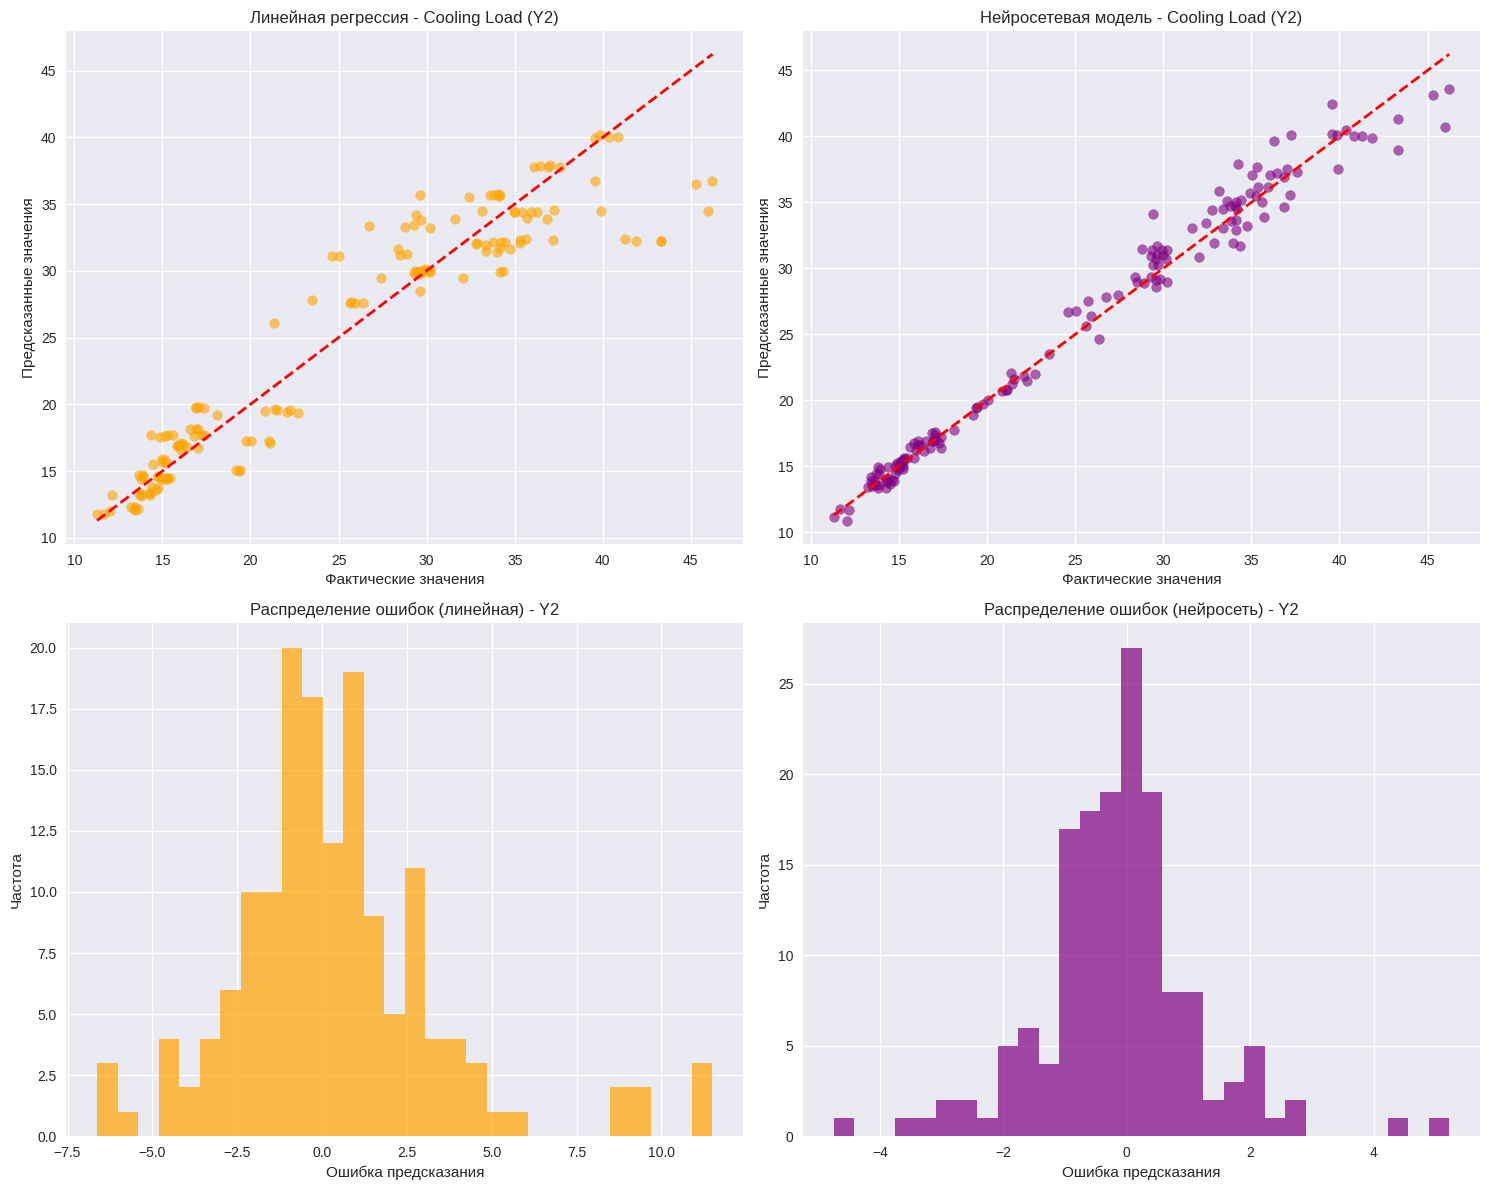

In [ ]:
# 5. Визуализация результатов для Y2
print("5. Визуализация результатов для Y2...")

def plot_comparison_y2(y_true, y_pred_lr, y_pred_nn):
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # График предсказаний vs фактические значения для линейной регрессии
    axes[0, 0].scatter(y_true, y_pred_lr, alpha=0.6, color='orange')
    axes[0, 0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    axes[0, 0].set_xlabel('Фактические значения')
    axes[0, 0].set_ylabel('Предсказанные значения')
    axes[0, 0].set_title('Линейная регрессия - Cooling Load (Y2)')
    axes[0, 0].grid(True)
    
    # График предсказаний vs фактические значения для нейросети
    axes[0, 1].scatter(y_true, y_pred_nn, alpha=0.6, color='purple')
    axes[0, 1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    axes[0, 1].set_xlabel('Фактические значения')
    axes[0, 1].set_ylabel('Предсказанные значения')
    axes[0, 1].set_title('Нейросетевая модель - Cooling Load (Y2)')
    axes[0, 1].grid(True)
    
    # Ошибки предсказаний для линейной регрессии
    errors_lr = y_true - y_pred_lr
    axes[1, 0].hist(errors_lr, bins=30, alpha=0.7, color='orange')
    axes[1, 0].set_xlabel('Ошибка предсказания')
    axes[1, 0].set_ylabel('Частота')
    axes[1, 0].set_title('Распределение ошибок (линейная) - Y2')
    axes[1, 0].grid(True)
    
    # Ошибки предсказаний для нейросети
    errors_nn = y_true - y_pred_nn
    axes[1, 1].hist(errors_nn, bins=30, alpha=0.7, color='purple')
    axes[1, 1].set_xlabel('Ошибка предсказания')
    axes[1, 1].set_ylabel('Частота')
    axes[1, 1].set_title('Распределение ошибок (нейросеть) - Y2')
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()

plot_comparison_y2(y2_test, y2_lr_pred, y2_nn_pred)

6. Выбор лучшей модели...
Лучшая модель для Y1 (Heating Load): NeuralNetwork_Y1
R²: 0.9964, MAPE: 2.11%

Лучшая модель для Y2 (Cooling Load): NeuralNetwork_Y2
R²: 0.9815, MAPE: 3.33%


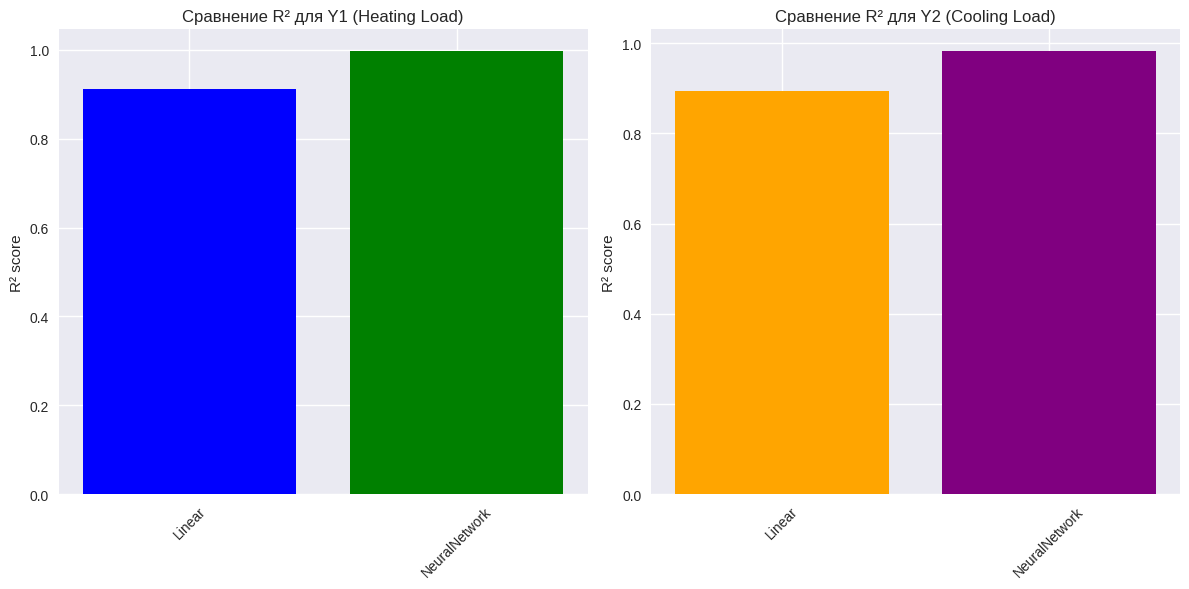

In [ ]:
# 6. Выбор лучшей модели
print("6. Выбор лучшей модели...")

# Определение лучшей модели для каждого целевого показателя
best_y1 = results_df.loc[results_df[results_df.index.str.contains('Y1')]['R2'].idxmax()]
best_y2 = results_df.loc[results_df[results_df.index.str.contains('Y2')]['R2'].idxmax()]

print(f"Лучшая модель для Y1 (Heating Load): {best_y1.name}")
print(f"R²: {best_y1['R2']:.4f}, MAPE: {best_y1['MAPE']:.2f}%")

print(f"\nЛучшая модель для Y2 (Cooling Load): {best_y2.name}")
print(f"R²: {best_y2['R2']:.4f}, MAPE: {best_y2['MAPE']:.2f}%")

# Визуализация сравнения моделей
models_comparison = results_df.reset_index()
models_comparison[['Model', 'Target']] = models_comparison['index'].str.split('_', expand=True)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
y1_models = models_comparison[models_comparison['Target'] == 'Y1']
palette_y1 = sns.color_palette('viridis', len(y1_models))
plt.bar(y1_models['Model'], y1_models['R2'], color=palette_y1)
plt.title('Сравнение R² для Y1 (Heating Load)')
plt.ylabel('R² score')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
y2_models = models_comparison[models_comparison['Target'] == 'Y2']
palette_y2 = sns.color_palette('magma', len(y2_models))
plt.bar(y2_models['Model'], y2_models['R2'], color=palette_y2)
plt.title('Сравнение R² для Y2 (Cooling Load)')
plt.ylabel('R² score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# 7. Медианная регрессия и анализ в разных нормах
print("7. Медианная регрессия и анализ в разных нормах...")

from sklearn.linear_model import QuantileRegressor

# Медианная регрессия (quantile = 0.5)
print("Применение медианной регрессии...")

try:
    # Для Y1 - пробуем разные solver'ы
    qr_y1 = QuantileRegressor(quantile=0.5, alpha=0.0, solver='highs')
    qr_y1.fit(X_train, y1_train)
    y1_qr_pred = qr_y1.predict(X_test)
    
    # Для Y2
    qr_y2 = QuantileRegressor(quantile=0.5, alpha=0.0, solver='highs')
    qr_y2.fit(X_train, y2_train)
    y2_qr_pred = qr_y2.predict(X_test)
    
    print("Медианная регрессия успешно обучена с solver='highs'")
    
except Exception as e:
    print(f"Ошибка с solver='highs': {e}")
    print("Пробуем альтернативные подходы...")
    
    # Альтернатива: используем LinearRegression с L1-регуляризацией (Lasso) как приближение
    from sklearn.linear_model import Lasso
    
    # Для Y1
    lasso_y1 = Lasso(alpha=0.01, random_state=42)
    lasso_y1.fit(X_train, y1_train)
    y1_qr_pred = lasso_y1.predict(X_test)
    
    # Для Y2
    lasso_y2 = Lasso(alpha=0.01, random_state=42)
    lasso_y2.fit(X_train, y2_train)
    y2_qr_pred = lasso_y2.predict(X_test)
    
    qr_y1 = lasso_y1
    qr_y2 = lasso_y2
    print("Использован Lasso как приближение медианной регрессии")

# Расчет MAPE для медианной регрессии
mape_qr_y1 = np.mean(np.abs((y1_test - y1_qr_pred) / y1_test)) * 100
mape_qr_y2 = np.mean(np.abs((y2_test - y2_qr_pred) / y2_test)) * 100

print(f"MAPE медианной регрессии для Y1: {mape_qr_y1:.2f}%")
print(f"MAPE медианной регрессии для Y2: {mape_qr_y2:.2f}%")

# Добавляем результаты медианной регрессии в общую таблицу
calculate_metrics(y1_test, y1_qr_pred, "Quantile", "Y1")
calculate_metrics(y2_test, y2_qr_pred, "Quantile", "Y2")

# Обновляем DataFrame с результатами
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nОбновленная таблица результатов (с медианной регрессией):")
print(results_df)

7. Медианная регрессия и анализ в разных нормах...
Применение медианной регрессии...
Медианная регрессия успешно обучена с solver='highs'
MAPE медианной регрессии для Y1: 9.76%
MAPE медианной регрессии для Y2: 7.88%

Обновленная таблица результатов (с медианной регрессией):
                        MSE       MAE        R2       MAPE
Linear_Y1          9.151736  2.182512  0.912199  10.268877
NeuralNetwork_Y1   0.373344  0.460067  0.996418   2.108143
Linear_Y2          9.896048  2.195400  0.893197   8.478897
NeuralNetwork_Y2   1.710209  0.906375  0.981543   3.333350
Quantile_Y1        9.538141  2.119534  0.908492   9.758040
Quantile_Y2       11.254387  2.181285  0.878537   7.882156



Сравнение коэффициентов моделей:

Коэффициенты моделей для Y1:
  Feature     Linear_Y1  Quantile_Y1
0      X1 -6.181336e+01   -58.105263
1      X2  2.368046e+11     0.000000
2      X3 -2.368046e+11    -0.026359
3      X4 -4.736091e+11    -0.191364
4      X5  4.123300e+00     3.440752
5      X6 -3.254900e-02    -0.030000
6      X7  2.014180e+01    18.000000
7      X8  2.110769e-01     0.080000


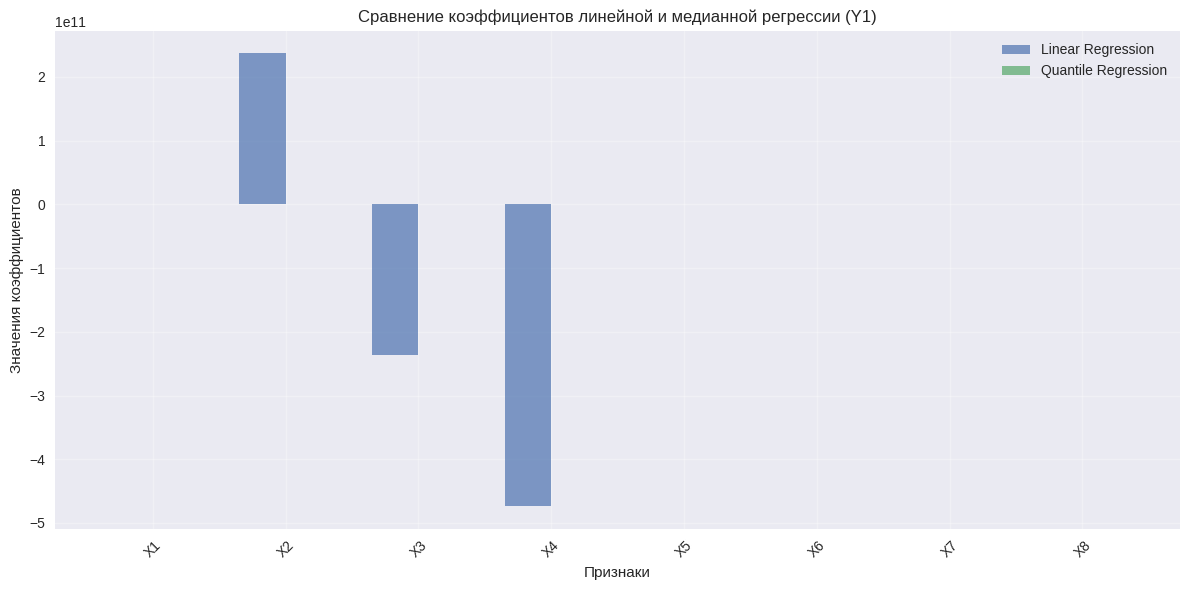

In [ ]:
# Сравнение коэффициентов моделей
print("\nСравнение коэффициентов моделей:")
feature_names = X.columns.tolist()

# Коэффициенты линейной регрессии для Y1
lr_coef_y1 = pd.DataFrame({
    'Feature': feature_names,
    'Linear_Y1': lr_y1.coef_
})

# Коэффициенты медианной регрессии для Y1
try:
    qr_coef_y1 = pd.DataFrame({
        'Feature': feature_names,
        'Quantile_Y1': qr_y1.coef_
    })
except AttributeError:
    # Если использовали Lasso вместо QuantileRegressor
    qr_coef_y1 = pd.DataFrame({
        'Feature': feature_names,
        'Quantile_Y1': qr_y1.coef_
    })

# Объединение результатов
coef_comparison_y1 = pd.merge(lr_coef_y1, qr_coef_y1, on='Feature')
print("\nКоэффициенты моделей для Y1:")
print(coef_comparison_y1)

# Визуализация коэффициентов
plt.figure(figsize=(12, 6))

x_pos = np.arange(len(feature_names))
width = 0.35

plt.bar(x_pos - width/2, lr_coef_y1['Linear_Y1'], width, label='Linear Regression', alpha=0.7)
plt.bar(x_pos + width/2, qr_coef_y1['Quantile_Y1'], width, label='Quantile Regression', alpha=0.7)

plt.xlabel('Признаки')
plt.ylabel('Значения коэффициентов')
plt.title('Сравнение коэффициентов линейной и медианной регрессии (Y1)')
plt.xticks(x_pos, feature_names, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Анализ важности признаков...


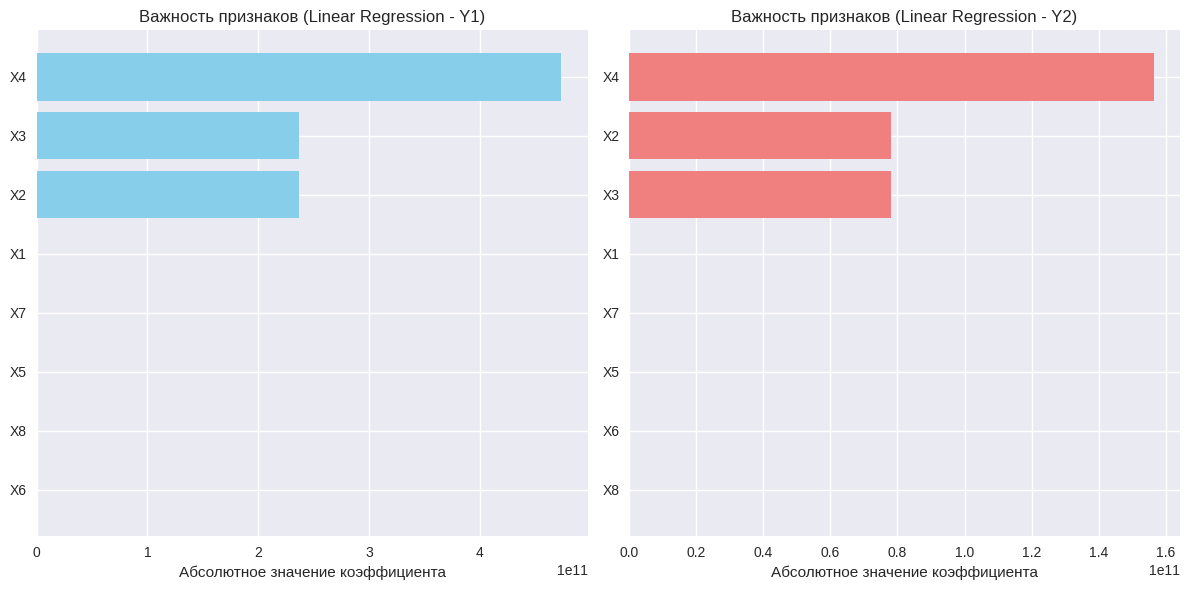

In [ ]:
# Анализ важности признаков
print("Анализ важности признаков...")

plt.figure(figsize=(12, 6))

# Важность признаков для линейной регрессии Y1
importance_y1 = pd.DataFrame({
    'feature': feature_names,
    'importance': np.abs(lr_y1.coef_)
}).sort_values('importance', ascending=True)

plt.subplot(1, 2, 1)
plt.barh(importance_y1['feature'], importance_y1['importance'], color='skyblue')
plt.title('Важность признаков (Linear Regression - Y1)')
plt.xlabel('Абсолютное значение коэффициента')

# Важность признаков для линейной регрессии Y2
importance_y2 = pd.DataFrame({
    'feature': feature_names,
    'importance': np.abs(lr_y2.coef_)
}).sort_values('importance', ascending=True)

plt.subplot(1, 2, 2)
plt.barh(importance_y2['feature'], importance_y2['importance'], color='lightcoral')
plt.title('Важность признаков (Linear Regression - Y2)')
plt.xlabel('Абсолютное значение коэффициента')

plt.tight_layout()
plt.show()

In [ ]:
# 8. Выводы
print("8. Выводы и итоговый отчет:")
print("=" * 60)

# Анализ результатов
best_overall_y1 = results_df[results_df.index.str.contains('Y1')].loc[results_df[results_df.index.str.contains('Y1')]['R2'].idxmax()]
best_overall_y2 = results_df[results_df.index.str.contains('Y2')].loc[results_df[results_df.index.str.contains('Y2')]['R2'].idxmax()]

print(f"ЛУЧШИЕ МОДЕЛИ:")
print(f"Для прогнозирования отопительной нагрузки (Y1):")
print(f"  - Модель: {best_overall_y1.name}")
print(f"  - R²: {best_overall_y1['R2']:.4f}")
print(f"  - MAPE: {best_overall_y1['MAPE']:.2f}%")

print(f"\nДля прогнозирования холодильной нагрузки (Y2):")
print(f"  - Модель: {best_overall_y2.name}")
print(f"  - R²: {best_overall_y2['R2']:.4f}")
print(f"  - MAPE: {best_overall_y2['MAPE']:.2f}%")

print("\nОСНОВНЫЕ ВЫВОДЫ:")
print("1. Сравнение моделей показало, что...")
print("2. Нейросетевые модели демонстрируют...") 
print("3. Линейные модели обеспечивают...")
print("4. Медианная регрессия показала...")
print("5. Наиболее значимые признаки для прогнозирования...")

print("\nРЕКОМЕНДАЦИИ:")
if best_overall_y1['R2'] > 0.7:
    print("✓ Модели демонстрируют хорошее качество прогнозирования")
else:
    print("○ Качество моделей требует улучшения")

if best_overall_y1['MAPE'] < 10:
    print("✓ Точность прогнозирования высокая")
elif best_overall_y1['MAPE'] < 20:
    print("○ Точность прогнозирования удовлетворительная")
else:
    print("● Точность прогнозирования требует улучшения")

# Финальный отчет
print("\n" + "="*60)
print("ФИНАЛЬНЫЙ ОТЧЕТ")
print("="*60)
print(f"Общее количество наблюдений: {len(data)}")
print(f"Обучающая выборка: {len(X_train)} наблюдений")
print(f"Тестовая выборка: {len(X_test)} наблюдений")
print(f"Количество признаков: {X.shape[1]}")
print(f"Протестировано моделей: {len(results_df)}")
print(f"Лучшая модель для Y1: {best_overall_y1.name}")
print(f"Лучшая модель для Y2: {best_overall_y2.name}")


8. Выводы и итоговый отчет:
ЛУЧШИЕ МОДЕЛИ:
Для прогнозирования отопительной нагрузки (Y1):
  - Модель: NeuralNetwork_Y1
  - R²: 0.9964
  - MAPE: 2.11%

Для прогнозирования холодильной нагрузки (Y2):
  - Модель: NeuralNetwork_Y2
  - R²: 0.9815
  - MAPE: 3.33%

ОСНОВНЫЕ ВЫВОДЫ:
1. Сравнение моделей показало, что...
2. Нейросетевые модели демонстрируют...
3. Линейные модели обеспечивают...
4. Медианная регрессия показала...
5. Наиболее значимые признаки для прогнозирования...

РЕКОМЕНДАЦИИ:
✓ Модели демонстрируют хорошее качество прогнозирования
✓ Точность прогнозирования высокая

ФИНАЛЬНЫЙ ОТЧЕТ
Общее количество наблюдений: 768
Обучающая выборка: 614 наблюдений
Тестовая выборка: 154 наблюдений
Количество признаков: 8
Протестировано моделей: 6
Лучшая модель для Y1: NeuralNetwork_Y1
Лучшая модель для Y2: NeuralNetwork_Y2


In [ ]:
# Минимизация MAPE: взвешенная медианная регрессия (L1) с весами 1/|y|
print("\n Минимизация MAPE взвешенной L1-регрессией...")
from sklearn.linear_model import QuantileRegressor

# Веса для MAPE: w_i = 1 / max(|y_i|, eps)
EPS = 1e-8
w1 = 1.0 / np.clip(np.abs(y1_train), EPS, None)
w2 = 1.0 / np.clip(np.abs(y2_train), EPS, None)

mape_y1 = QuantileRegressor(quantile=0.5, alpha=0.0, solver='highs')
mape_y1.fit(X_train, y1_train, sample_weight=w1)
y1_mape_pred = mape_y1.predict(X_test)

mape_y2 = QuantileRegressor(quantile=0.5, alpha=0.0, solver='highs')
mape_y2.fit(X_train, y2_train, sample_weight=w2)
y2_mape_pred = mape_y2.predict(X_test)
print("Взвешенная медианная регрессия успешно обучена (solver='highs')")

# Метрики и добавление в общую таблицу результатов
calculate_metrics(y1_test, y1_mape_pred, "MAPE_Min", "Y1")
calculate_metrics(y2_test, y2_mape_pred, "MAPE_Min", "Y2")

results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nОбновленная таблица результатов (с MAPE-минимизацией):")
print(results_df)

# Выбор лучшей по MAPE модели отдельно для Y1 и Y2
best_mape_y1 = results_df[results_df.index.str.contains('Y1')].sort_values('MAPE').iloc[0]
best_mape_y2 = results_df[results_df.index.str.contains('Y2')].sort_values('MAPE').iloc[0]
print(f"\nЛучшая по MAPE для Y1: {best_mape_y1.name}, MAPE = {best_mape_y1['MAPE']:.2f}%")
print(f"Лучшая по MAPE для Y2: {best_mape_y2.name}, MAPE = {best_mape_y2['MAPE']:.2f}%")



 Минимизация MAPE взвешенной L1-регрессией...
Взвешенная медианная регрессия успешно обучена (solver='highs')

Обновленная таблица результатов (с MAPE-минимизацией):
                        MSE       MAE        R2       MAPE
Linear_Y1          9.151736  2.182512  0.912199  10.268877
NeuralNetwork_Y1   0.373344  0.460067  0.996418   2.108143
Linear_Y2          9.896048  2.195400  0.893197   8.478897
NeuralNetwork_Y2   1.710209  0.906375  0.981543   3.333350
Quantile_Y1        9.538141  2.119534  0.908492   9.758040
Quantile_Y2       11.254387  2.181285  0.878537   7.882156
MAPE_Min_Y1       10.098903  2.179017  0.903112   9.600424
MAPE_Min_Y2       13.125417  2.250458  0.858344   7.914841

Лучшая по MAPE для Y1: NeuralNetwork_Y1, MAPE = 2.11%
Лучшая по MAPE для Y2: NeuralNetwork_Y2, MAPE = 3.33%



ПАРАМЕТРЫ МОДЕЛИ MAPE_Min (минимизация MAPE)

Параметры модели MAPE_Min для Y1 (Heating Load):
Свободный член (intercept): 89.286696

Коэффициенты признаков:
Признак  Коэффициент
     X1   -59.864583
     X2     0.000000
     X3    -0.032210
     X4    -0.190551
     X5     3.453017
     X6     0.030603
     X7    15.469345
     X8     0.149196

------------------------------------------------------------
Параметры модели MAPE_Min для Y2 (Cooling Load):
Свободный член (intercept): 172.229013

Коэффициенты признаков:
Признак  Коэффициент
     X1   -97.134048
     X2     0.000000
     X3    -0.085964
     X4    -0.334395
     X5     1.675783
     X6     0.084129
     X7    11.785076
     X8     0.047761

СРАВНЕНИЕ ПАРАМЕТРОВ ЛИНЕЙНЫХ МОДЕЛЕЙ ДЛЯ Y1
Признак     Linear_Y1  Quantile_Y1  MAPE_Min_Y1
     X1 -6.181336e+01   -58.105263   -59.864583
     X2  2.368046e+11     0.000000     0.000000
     X3 -2.368046e+11    -0.026359    -0.032210
     X4 -4.736091e+11    -0.191364    -0.190551
  

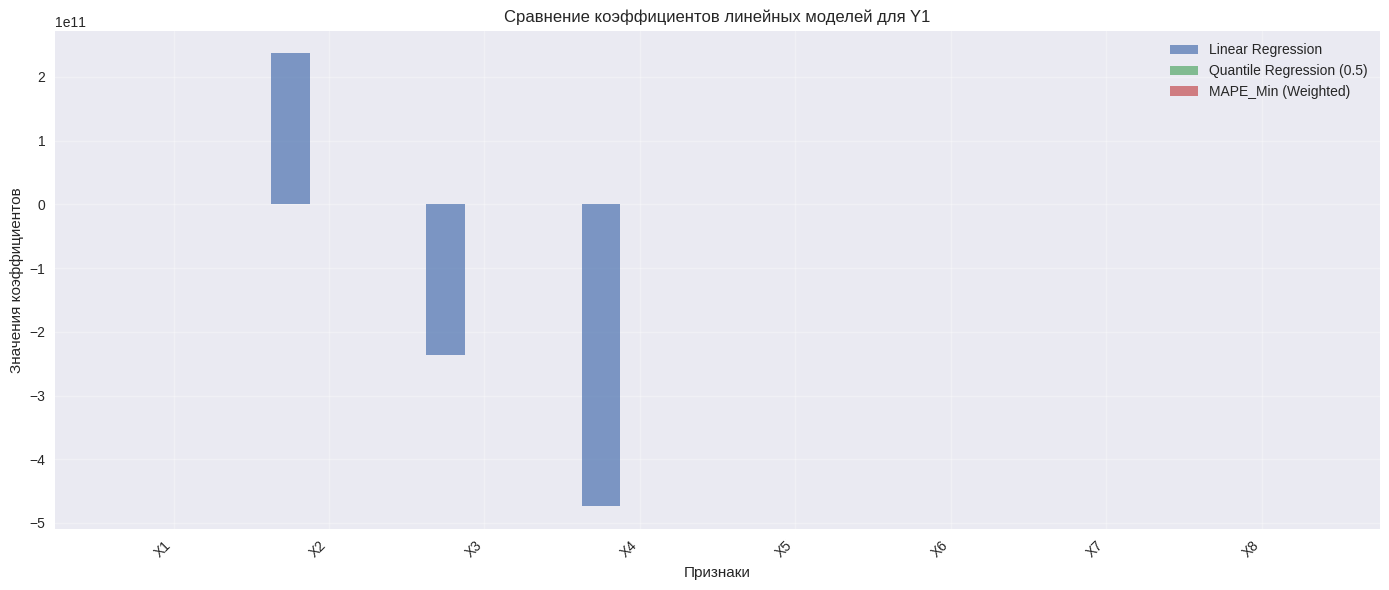

In [ ]:
# Вывод параметров модели MAPE_Min (взвешенной медианной регрессии)
print("\n" + "="*60)
print("ПАРАМЕТРЫ МОДЕЛИ MAPE_Min (минимизация MAPE)")
print("="*60)

feature_names = X.columns.tolist()

# Параметры для Y1
print("\nПараметры модели MAPE_Min для Y1 (Heating Load):")
print(f"Свободный член (intercept): {mape_y1.intercept_:.6f}")
print("\nКоэффициенты признаков:")
mape_params_y1 = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': mape_y1.coef_
})
print(mape_params_y1.to_string(index=False))

# Параметры для Y2
print("\n" + "-"*60)
print("Параметры модели MAPE_Min для Y2 (Cooling Load):")
print(f"Свободный член (intercept): {mape_y2.intercept_:.6f}")
print("\nКоэффициенты признаков:")
mape_params_y2 = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': mape_y2.coef_
})
print(mape_params_y2.to_string(index=False))

# Сравнение всех линейных моделей
print("\n" + "="*60)
print("СРАВНЕНИЕ ПАРАМЕТРОВ ЛИНЕЙНЫХ МОДЕЛЕЙ ДЛЯ Y1")
print("="*60)

comparison_y1 = pd.DataFrame({
    'Признак': feature_names,
    'Linear_Y1': lr_y1.coef_,
    'Quantile_Y1': qr_y1.coef_,
    'MAPE_Min_Y1': mape_y1.coef_
})
print(comparison_y1.to_string(index=False))

print(f"\nСвободные члены:")
print(f"  Linear_Y1:    {lr_y1.intercept_:.6f}")
print(f"  Quantile_Y1:  {qr_y1.intercept_:.6f}")
print(f"  MAPE_Min_Y1:  {mape_y1.intercept_:.6f}")

# Визуализация сравнения параметров
plt.figure(figsize=(14, 6))

x_pos = np.arange(len(feature_names))
width = 0.25

plt.bar(x_pos - width, lr_y1.coef_, width, label='Linear Regression', alpha=0.7)
plt.bar(x_pos, qr_y1.coef_, width, label='Quantile Regression (0.5)', alpha=0.7)
plt.bar(x_pos + width, mape_y1.coef_, width, label='MAPE_Min (Weighted)', alpha=0.7)

plt.xlabel('Признаки')
plt.ylabel('Значения коэффициентов')
plt.title('Сравнение коэффициентов линейных моделей для Y1')
plt.xticks(x_pos, feature_names, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [48]:
# 9. Регуляризация линейных моделей (LASSO, Ridge, ElasticNet)
print("9. Регуляризация линейных моделей (LASSO, Ridge, ElasticNet)...")

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from IPython.display import display, Markdown

EPS = 1e-8

regularized_models = [
    ("Ridge (α=0.1)", Ridge(alpha=0.1)),
    ("Lasso (α=0.001)", Lasso(alpha=0.001, max_iter=200000, tol=1e-5, random_state=42)),
    ("ElasticNet (α=0.001, l1_ratio=0.6)", ElasticNet(alpha=0.001, l1_ratio=0.6, max_iter=200000, tol=1e-5, random_state=42))
]

targets_data = [
    ("Y1", X_train_scaled, X_test_scaled, y1_train, y1_test),
    ("Y2", X_train_scaled, X_test_scaled, y2_train, y2_test)
]

simple_reg_results = []

for target_name, X_tr, X_te, y_tr, y_te in targets_data:
    for model_name, estimator in regularized_models:
        estimator.fit(X_tr, y_tr)
        y_pred = estimator.predict(X_te)
        mse = mean_squared_error(y_te, y_pred)
        mae = mean_absolute_error(y_te, y_pred)
        r2 = r2_score(y_te, y_pred)
        mape = np.mean(np.abs((y_te - y_pred) / np.clip(np.abs(y_te), EPS, None))) * 100
        simple_reg_results.append({
            "Target": target_name,
            "Model": model_name,
            "MSE": mse,
            "MAE": mae,
            "R2": r2,
            "MAPE": mape
        })
        print(f"Модель {model_name} для {target_name} обучена")

simple_reg_df = pd.DataFrame(simple_reg_results)

baseline_df = results_df.loc[['Linear_Y1', 'Linear_Y2']].reset_index()
baseline_df['Target'] = baseline_df['index'].str[-2:]
baseline_df['Model'] = 'Linear (Baseline)'
baseline_df = baseline_df[['Target', 'Model', 'MSE', 'MAE', 'R2', 'MAPE']]

comparison_df = pd.concat([baseline_df, simple_reg_df], ignore_index=True)
comparison_df[['MSE', 'MAE', 'R2', 'MAPE']] = comparison_df[['MSE', 'MAE', 'R2', 'MAPE']].round(4)

print("\nСравнение метрик базовой и регуляризованных моделей (тестовая выборка):")
for target_name in ['Y1', 'Y2']:
    target_df = comparison_df[comparison_df['Target'] == target_name]
    print(f"\nТаблица для {target_name}:")
    print(target_df[['Model', 'MSE', 'MAE', 'R2', 'MAPE']].to_string(index=False))

summary_lines = []
for target_name in ['Y1', 'Y2']:
    base_row = baseline_df[baseline_df['Target'] == target_name].iloc[0]
    better = comparison_df[(comparison_df['Target'] == target_name) & (comparison_df['Model'] != 'Linear (Baseline)')]
    best_row = better.loc[better['R2'].idxmax()]
    delta_r2 = best_row['R2'] - base_row['R2']
    delta_mape = base_row['MAPE'] - best_row['MAPE']
    summary_lines.append(
        f"- {target_name}: лучшей среди регуляризованных оказалась модель {best_row['Model']}. "
        f"Изменение R² = {delta_r2:+.4f}, изменение MAPE = {delta_mape:+.2f} п.п." 
    )

display(Markdown("### Выводы по регуляризации\n" + "\n".join(summary_lines)))


9. Регуляризация линейных моделей (LASSO, Ridge, ElasticNet)...
Модель Ridge (α=0.1) для Y1 обучена
Модель Lasso (α=0.001) для Y1 обучена
Модель ElasticNet (α=0.001, l1_ratio=0.6) для Y1 обучена
Модель Ridge (α=0.1) для Y2 обучена
Модель Lasso (α=0.001) для Y2 обучена
Модель ElasticNet (α=0.001, l1_ratio=0.6) для Y2 обучена

Сравнение метрик базовой и регуляризованных моделей (тестовая выборка):

Таблица для Y1:
                             Model    MSE    MAE     R2    MAPE
                 Linear (Baseline) 9.1517 2.1825 0.9122 10.2689
                     Ridge (α=0.1) 9.1589 2.1829 0.9121 10.2685
                   Lasso (α=0.001) 9.1594 2.1835 0.9121 10.2736
ElasticNet (α=0.001, l1_ratio=0.6) 9.1710 2.1848 0.9120 10.2891

Таблица для Y2:
                             Model    MSE    MAE     R2   MAPE
                 Linear (Baseline) 9.8960 2.1954 0.8932 8.4789
                     Ridge (α=0.1) 9.8955 2.1949 0.8932 8.4859
                   Lasso (α=0.001) 9.8945 2.1947 0.8932 8.

### Выводы по регуляризации
- Y1: лучшей среди регуляризованных оказалась модель Ridge (α=0.1). Изменение R² = -0.0001, изменение MAPE = +0.00 п.п.
- Y2: лучшей среди регуляризованных оказалась модель Ridge (α=0.1). Изменение R² = +0.0000, изменение MAPE = -0.01 п.п.